## TVB TimeSeries Widget

#### This notebook is dedicated to showcasing the TimeSeries widget using TVB data

---

### Intial setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

### Imports

In [3]:
from tvbwidgets.api import TimeSeriesWidget
import numpy as np
import mne
from IPython.core.display_functions import display

21-03-2022 09:06:01 - DEBUG - tvbwidgets - Package is not fully installed
21-03-2022 09:06:01 - DEBUG - tvbwidgets - Version read from the internal _version.py file
21-03-2022 09:06:01 - INFO - tvbwidgets - Version: 0.1.dev25+g9d7cb39.d20220222


C:\ProgramData\Anaconda3\envs\tvb-widgets\lib\site-packages\pkg_resources\__init__.py:122: PkgResourcesDeprecationWarning: -PKG-VERSION is an invalid version and will not be supported in a future release
  warnings.warn(


In [4]:
# imports for generating data
from tvb.simulator.lab import *
from tvb.datatypes import time_series
from tvb.basic.config import settings
import tvb.datatypes.time_series

### Generate TVB data

In [5]:
conn = connectivity.Connectivity.from_file()

# configure stimulus spatial pattern
weighting = np.zeros((76, ))
weighting[[14, 52, 11, 49]] = 0.1

WARNING  File 'hemispheres' not found in ZIP.


In [6]:
eqn_t = equations.PulseTrain()
eqn_t.parameters['onset'] = 1.5e3
eqn_t.parameters['T'] = 100.0
eqn_t.parameters['tau'] = 50.0

In [7]:
stimulus = patterns.StimuliRegion(
    temporal=eqn_t,
    connectivity=conn,
    weight=weighting)

In [8]:
#Configure space and time
stimulus.configure_space()
stimulus.configure_time(np.arange(0., 3e3, 2**-4))

In [9]:
sim = simulator.Simulator(
    model=models.Generic2dOscillator(a=np.array([0.3]), tau=np.array([2])),
    connectivity=conn,
    coupling=coupling.Difference(a=np.array([7e-4])),
    integrator=integrators.HeunStochastic(dt=0.5, noise=noise.Additive(nsig=np.array([5e-5]))),
    monitors=(
        monitors.TemporalAverage(period=1.0),
        ),
    stimulus=stimulus,
    simulation_length=5e3, # 1 minute simulation
).configure()

(tavg_time, tavg_data),  = sim.run()

   INFO  White noise configured with dt=0.5


In [10]:
tsr = tvb.datatypes.time_series.TimeSeriesRegion(
    data=tavg_data,
    connectivity=conn,
    sample_period=sim.monitors[0].period / 1000.0, 
    sample_period_unit="s")
tsr.configure()
tsr

,value
Dimensions,"('Time', 'State Variable', 'Region', 'Mode')"
Length,5.0
Region Mapping,None
Region Mapping Volume,None
Sample period,0.001
Source Connectivity,Connectivity gid: 16cff496-65c9-49b1-ba3d-e0a9d90ccfc0
Time units,s
Time-series name,TimeSeriesRegion gid: 9f38dd36-f8f5-48bd-972f-f1b34d4a5adf
Time-series type,TimeSeriesRegion
"[min, median, max]","[-1.53398, 0.0317675, 3.65151]"


### Plot data using widget

In [42]:
ts = TimeSeriesWidget(data=tsr)

Creating RawArray with float64 data, n_channels=76, n_times=5000
    Range : 0 ... 4999 =      0.000 ...     4.999 secs
Ready.


GridBox(children=(Accordion(children=(HBox(children=(VBox(children=(Checkbox(value=True, description='0', inde…

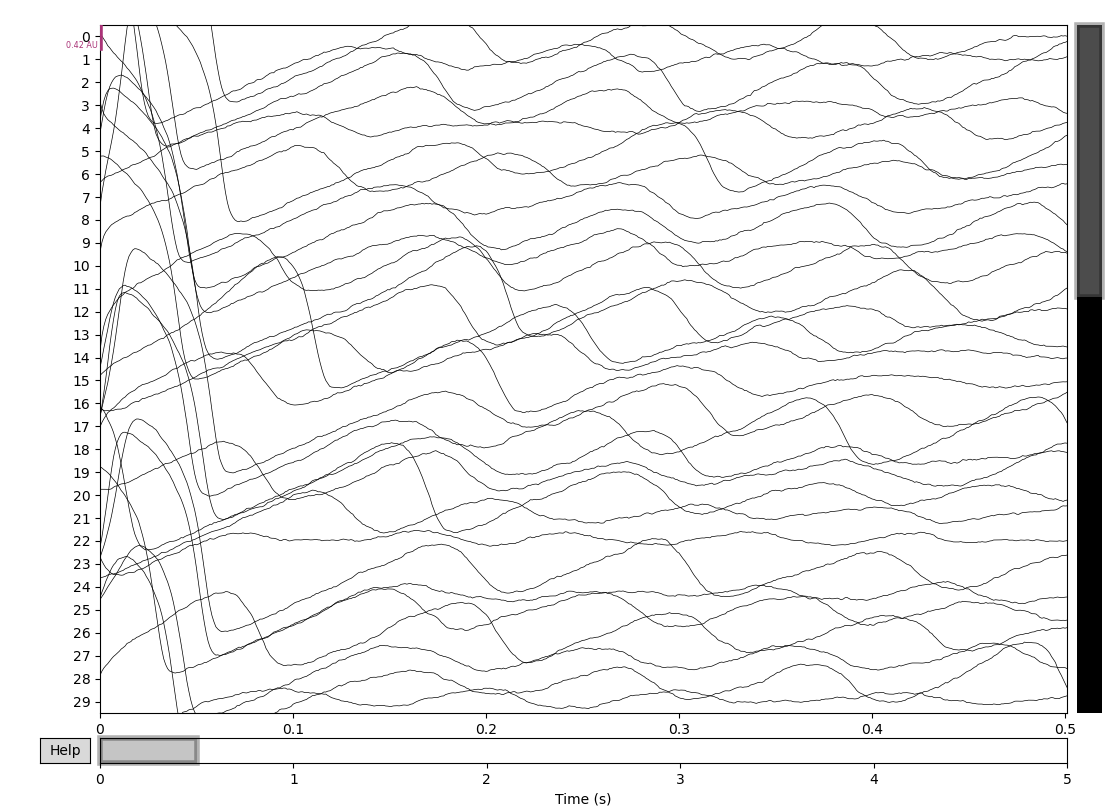

In [43]:
display(ts.get_widget())